In [38]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# get ANOVA table as R like output
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.formula.api import ols, mnlogit
from sklearn.preprocessing import PolynomialFeatures

__Example 16.2.1__ (Placement test scores) At a large university, a group of the faculty strongly believes that the success of students is closely related to their scores on the placement tests in mathematics and English, where the success of a student is measured by his/her cumulative GPA. The regression model that might explain the faculty’s belief is

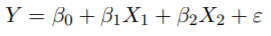

where Y represents the cumulative GPA and X1 and X2 represents the scores on the placement tests in mathematics and English, respectively. In order to examine whether or not the scores on the placement tests determines the success of the students, the university authorities selected a random sample of 20 students and recorded their cumulative GPA and the placement scores as in Table 16.1.

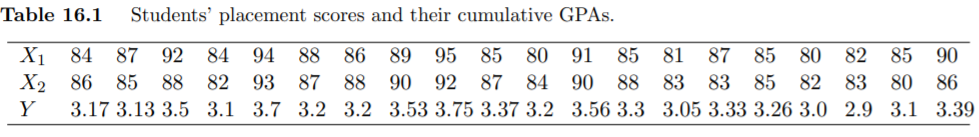

In [3]:
Y = [3.17,3.13,3.5,3.1,3.7,3.2,3.2,3.53,3.75,3.37,3.2,3.56,3.3,3.05,3.33,3.26,3,2.9,3.1,3.39]
X1 = [84,87,92,84,94,88,86,89,95,85,80,91,85,81,87,85,80,82,85,90]
X2 = [86,85,88,82,93,87,88,90,92,87,84,90,88,83,83,85,82,83,80,86]

# storing X1, X2 and Y data into a dataframe
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

##### _model 1_

In [5]:
# Ordinary Least Squares (OLS) model; multi-linear model
model = ols('Y ~ X1 + X2', data=df).fit()

# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq    df          F    PR(>F)
X1        0.109734   1.0  12.402872  0.002618
X2        0.074612   1.0   8.433148  0.009879
Residual  0.150407  17.0        NaN       NaN


##### model 2

In [19]:
# Ordinary Least Squares (OLS) model
model = ols('Y ~ X1 + X2 + I(X1**2) + I(X2**2) + I(X1*X2)', data=df).fit()

# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df         F    PR(>F)
X1          0.000566   1.0  0.074668  0.788648
X2          0.000883   1.0  0.116431  0.738005
I(X1 ** 2)  0.037661   1.0  4.965896  0.042756
I(X2 ** 2)  0.029801   1.0  3.929448  0.067428
I(X1 * X2)  0.032942   1.0  4.343692  0.055948
Residual    0.106175  14.0       NaN       NaN


__Example 16.4.2__ (Home prices) During the 2008–09 recession, home prices declined significantly throughout the United States. Many locations, however, were affected more seriously than others. The Orlando area in Florida was one location hit especially hard. Table 16.2 provides the listed prices for 28 randomly selected homes and associated predictor variables. Using R, fit a first-order multiple regression model with all the terms to these data. We let:

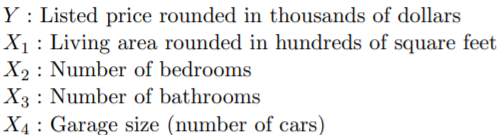

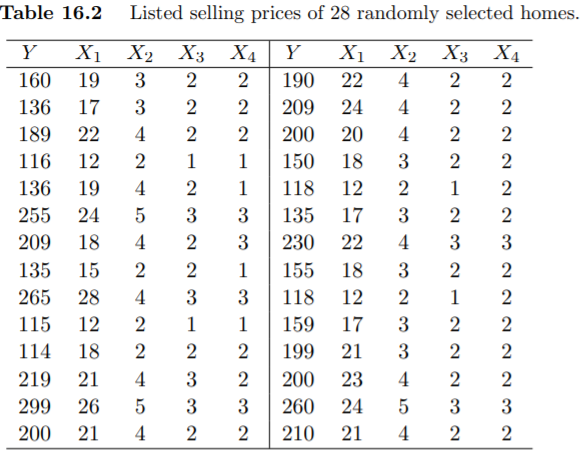

In [22]:
Y = [160,136,189,116,136,255,209,135,265,115,114,219,299,200,190,209,200,150,118,135,230,155,118,159,199,200,260,210]
X1 = [19,17,22,12,19,24,18,15,28,12,18,21,26,21,22,24,20,18,12,17,22,18,12,17,21,23,24,21]
X2 = [3,3,4,2,4,5,4,2,4,2,2,4,5,4,4,4,4,3,2,3,4,3,2,3,3,4,5,4]
X3 = [2,2,2,1,2,3,2,2,3,1,2,3,3,2,2,2,2,2,1,2,3,2,1,2,2,2,3,2]
X4 = [2,2,2,1,1,3,3,1,3,1,2,2,3,2,2,2,2,2,2,2,3,2,2,2,2,2,3,2]

# storing X1 -> X4 and Y data into a dataframe
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'Y': Y})

In [23]:
# Fitting MLR model using predictors X1, X2, X3, and X4
model = ols('Y ~ X1 + X2 + X3 + X4', data=df).fit()

# ANOVA model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
X1        1463.214217   1.0  4.317562  0.049069
X2        2345.790610   1.0  6.921813  0.014936
X3         108.774960   1.0  0.320966  0.576515
X4        2425.183752   1.0  7.156081  0.013521
Residual  7794.660630  23.0       NaN       NaN


__Example 16.6.1__ (Home prices data) Refer to the data in Example 16.4.2. Fit a multiple linear regression model using the method of stepwise regression (forward selection) in Python.

In [24]:
import statsmodels.formula.api as smf

#-----SOURCE for following function: https://planspace.org/20150423-forward_selection_with_statsmodels/----#
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [25]:
Y = [160,136,189,116,136,255,209,135,265,115,114,219,299,200,190,209,200,150,118,135,230,
155,118,159,199,200,260,210]
X1 = [19,17,22,12,19,24,18,15,28,12,18,21,26,21,22,24,20,18,12,17,22,18,12,17,21,23,24,21]
X2 = [3,3,4,2,4,5,4,2,4,2,2,4,5,4,4,4,4,3,2,3,4,3,2,3,3,4,5,4]
X3 = [2,2,2,1,2,3,2,2,3,1,2,3,3,2,2,2,2,2,1,2,3,2,1,2,2,2,3,2]
X4 = [2,2,2,1,1,3,3,1,3,1,2,2,3,2,2,2,2,2,2,2,3,2,2,2,2,2,3,2]

# storing X1 -> X4 and Y data into a dataframe
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'Y': Y})

In [27]:
model = forward_selected(df, 'Y')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     65.23
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           1.10e-11
Time:                        10:58:23   Log-Likelihood:                -118.73
No. Observations:                  28   AIC:                             245.5
Df Residuals:                      24   BIC:                             250.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.8426     16.712     -1.666      0.109     -62.334       6.648
X1             4.6037      1.682      2.737      0.011       1.132       8.075
X4            24.0901      7.814      3.083      0.005       7.963      40.217
X2            20.4535      7.429      2.753      0.011       5.122      35.785
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.545
Skew:                           0.073   Prob(JB):                        0.761
Kurtosis:                       2.332   Cond. No.                         99.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Example 16.8.1__ (Obstructive coronary artery disease-related data) Eighteen subjects (eight women and 10 men) with a history of high cholesterol levels are tested for obstructive coronary artery disease (OCAD). The results of the test, represented by a binary variable Y (Y = 1 when a person has OCAD and Y = 0 when a person does not have OCAD) and the predictor variables X1 (age), X2 (total cholesterol level), and X3 (categorical predictor variable, 1 for women and 0 for men) are shown in Table 16.3. Analyze these data using logistic regression.

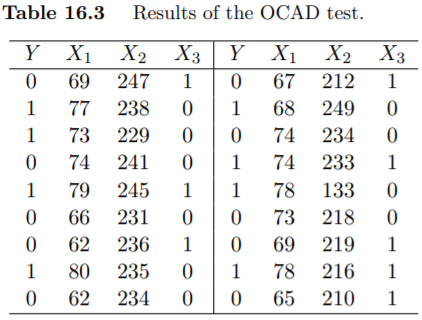

In [33]:
Y = [0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0]
X1 = [69,77,73,74,79,66,62,80,62,67,68,74,74,78,73,69,78,65]
X2 = [247,238,229,241,245,231,236,235,234,212,249,234,233,133,218,219,216,210]
X3 = [1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1]

# storing X1, X2 and Y data into a dataframe
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

In [44]:
# Fitting MLR model using predictors X1, X2, X3, and X4
formula = 'Y ~ X1 + X2 + X3'
model = smf.api.glm(formula=formula, data=df, family=sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:                   18
Model:                            GLM   Df Residuals:                       14
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6.9826
Date:                Sun, 20 Jun 2021   Deviance:                       13.965
Time:                        11:19:13   Pearson chi2:                     14.7
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.3432     17.437     -1.855      0.064     -66.520       1.833
X1             0.4277      0.200      2.133      0.033       0.035       0.821
X2             0.0048      0.027      0.175      0.861      -0.049       0.058
X3             0.2239      1.465      0.153      0.879      -2.648       3.096
==============================================================================
"""